Find a dataset and build a KNN regression and an OLS regression. Compare the two. How similar are they? Do they 
miss in different ways?

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns


In [31]:
hrtfailure_df = pd.read_csv(r'C:\Users\cholo\OneDrive\Desktop\Heart Failure Dataset.csv')
hrtfailure_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [32]:
hrtfailure_df.shape

(299, 13)

In [33]:
hrtfailure_df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [34]:
hrtfailure_df.corr()['DEATH_EVENT']

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

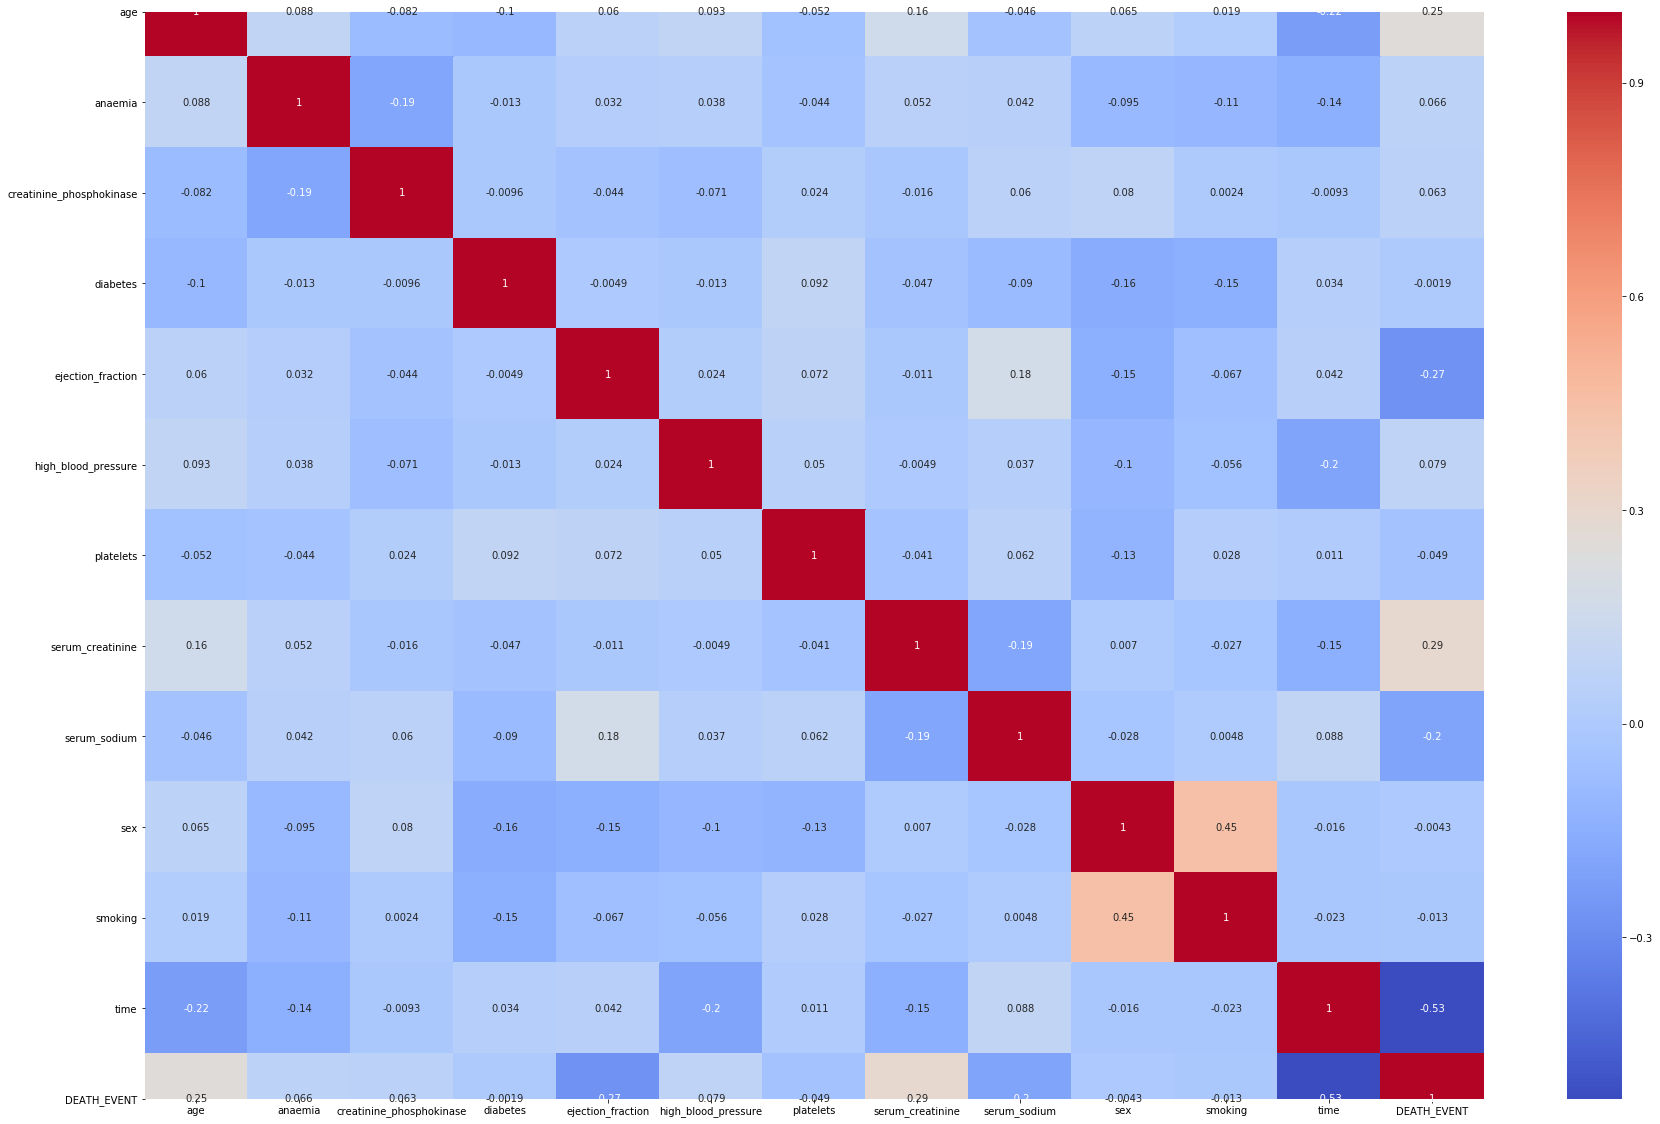

In [35]:
plt.figure(figsize=(30,20))
sns.heatmap(hrtfailure_df.corr(), annot=True, cmap='coolwarm')

Higly correlated features to DEATH_EVENT are: age, ejection_fraction, serum_sodium

In [36]:
list(hrtfailure_df.columns)

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [37]:
hrtfailure_df2 = hrtfailure_df.drop(columns=['anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 
                                            'platelets', 'sex', 'smoking', 'time'])

hrtfailure_df2

,age,ejection_fraction,serum_creatinine,serum_sodium,DEATH_EVENT
0,75.0,20,1.9,130,1
1,55.0,38,1.1,136,1
2,65.0,20,1.3,129,1
3,50.0,20,1.9,137,1
4,65.0,20,2.7,116,1
...,...,...,...,...,...
294,62.0,38,1.1,143,0
295,55.0,38,1.2,139,0
296,45.0,60,0.8,138,0
297,45.0,38,1.4,140,0


In [38]:
from sklearn.model_selection import train_test_split
X = hrtfailure_df2[['serum_sodium']]
Y = hrtfailure_df2['DEATH_EVENT']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=100)

print('The number of observation is training set is {}'.format(X_train.shape[0]))
print('The number of observation is test set is {}'.format(Y_test.shape[0]))

The number of observation is training set is 239
The number of observation is test set is 60


In [39]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(X['serum_sodium'].values.reshape(-1,1), Y)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

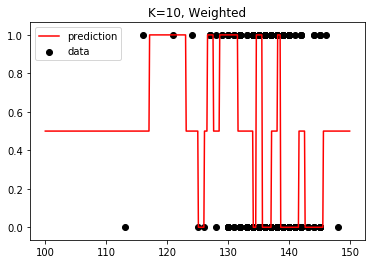

In [40]:
#knn.fit(X_train, Y_train)
T = np.arange(100, 150, 0.1)[:, np.newaxis]
hrtfailure_predict = knn.predict(T)


plt.scatter(X['serum_sodium'], Y, c='k', label='data')
plt.plot(T, hrtfailure_predict, c='r', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [41]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=10)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -1.74 (+/- 3.26)
Weighted Accuracy: -2.44 (+/- 4.33)


Both Unweighted and Weighted Accuracy are far from our target number which is 0.  Thus the relationship between serum_sodium and Death_Events have no statistical relationship or statistically insignificant.  

Linear Regression

In [42]:
from sklearn import linear_model
Y = hrtfailure_df[['serum_sodium']]
X = hrtfailure_df[['serum_sodium']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [[1.]]

Intercept: 
 [2.84217094e-14]


In [28]:
import statsmodels.api as sm

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

C:\Users\cholo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           serum_sodium   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.817e+30
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:51:29   Log-Likelihood:                 8697.5
No. Observations:                 299   AIC:                        -1.739e+04
Df Residuals:                     297   BIC:                        -1.738e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.263e-14   1.01e-13      0.420      0.675   -1.57e-13    2.42e-13
serum_sodium     1.0000   7.42e-16   1.35e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      376.089   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19535.136
Skew:                          -5.926   Prob(JB):                         0.00
Kurtosis:                      40.783   Cond. No.                     4.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Find a dataset and build a KNN regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?



 In KNN Classification the results was there was no significant relationship between serum_sodium and death events.  In Linear Regression it reveals that there is a significant relationship between serum sodium and death events with a coefficient of 1. Both model targets 0 as a reference number to determine the if the results is significant or not.